# PISA Data Exploration

**Author:** Tran Anh Tong

PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is used to examine how well students have learned the school curriculum and how well prepared they are for life beyond school.

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. 

Some questions would be answered in the project

* Does the age when a child begins learning the language using in the test impact their performance?
* Do children in more freedom countries perform differently than those in less freedom countries?
* Does economic, social, and cultural status – advantage vs. disadvantage – relate to academic performance?

## Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [2]:
df = pd.read_csv('pisa2012.csv', sep=',', encoding='latin-1', error_bad_lines=False, index_col=False, dtype='unicode')

In [3]:
df_freedom = pd.read_csv('Freedom_in_the_World_2012.csv')

## Assessment

In [4]:
df.head(10)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00001,10,1,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00002,10,1,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00003,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00004,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00005,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
5,6,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00006,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
6,7,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00007,10,1,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
7,8,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00008,10,1,...,14.4599,14.6374,15.8728,15.8728,5.2248,15.2579,19,1,0.2322,22NOV13
8,9,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00009,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
9,10,Albania,0080000,ALB0005,Non-OECD,Albania,0000002,00010,10,1,...,3.3844,10.1533,3.3844,10.1533,10.1533,10.1533,74,2,0.1594,22NOV13


In [5]:
df.shape

(485490, 636)

In [6]:
df_freedom.head(10)

,country,SUBNATIO,political_rights,civil_liberties,freedom_status
0,Albania,80000,3,3,PF
1,Argentina,320000,2,2,F
2,Argentina,320100,2,2,F
3,Australia,360000,1,1,F
4,Austria,400000,1,1,F
5,Belgium,560000,1,1,F
6,Belgium,560100,1,1,F
7,Brazil,760000,2,2,F
8,Bulgaria,1000000,2,2,F
9,Canada,1240000,1,1,F


In [7]:
df_freedom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
country             86 non-null object
SUBNATIO            86 non-null int64
political_rights    86 non-null int64
civil_liberties     86 non-null int64
freedom_status      86 non-null object
dtypes: int64(3), object(2)
memory usage: 3.5+ KB


### Assessment

The set has **485,490 rows** representing individual students in the survey. There are **636 columns** that contain data about lots of different factors about the student, there they live, their economic, social, and cultural status, their attitudes about learning, and their performance on a panel of math, reading, and science assessments. Many of the qualitative columns contain string values that represent a scale. 

For my assessment, I will be using `ESCS` to represent student economic, social, and cultural status. I will do feature engineering to create new values to average each of the 5 math, reading, and science tests into single scores for each subject. I will also be looking at these factors against the _Freedom House_ freedom scores.

## Cleaning

In [8]:
# Make a copy
df_clean = df.copy()

In [9]:
df_clean['NC'] = df_clean['NC'].apply(lambda x: x.strip())

For Freedom House data

In [10]:
df_freedom['SUBNATIO']=df_freedom['SUBNATIO'].astype(str)

In [11]:
df_clean = pd.merge(df_clean, df_freedom, left_on='SUBNATIO', right_on='SUBNATIO')
df_clean.drop(columns=['country'], inplace=True)

### Overall Score

I decided to use the average of each of the five scores in each category as an score to compute the average of all scores as an overall score.

In [12]:
df_clean['PV1MATH']= df_clean['PV1MATH'].astype(float)
df_clean['PV2MATH']= df_clean['PV2MATH'].astype(float)
df_clean['PV3MATH']= df_clean['PV3MATH'].astype(float)
df_clean['PV4MATH']= df_clean['PV4MATH'].astype(float)
df_clean['PV5MATH']= df_clean['PV5MATH'].astype(float)

In [13]:
df_clean['PV1READ']= df_clean['PV1READ'].astype(float)
df_clean['PV2READ']= df_clean['PV2READ'].astype(float)
df_clean['PV3READ']= df_clean['PV3READ'].astype(float)
df_clean['PV4READ']= df_clean['PV4READ'].astype(float)
df_clean['PV5READ']= df_clean['PV5READ'].astype(float)

In [14]:
df_clean['PV1SCIE']= df_clean['PV1SCIE'].astype(float)
df_clean['PV2SCIE']= df_clean['PV2SCIE'].astype(float)
df_clean['PV3SCIE']= df_clean['PV3SCIE'].astype(float)
df_clean['PV4SCIE']= df_clean['PV4SCIE'].astype(float)
df_clean['PV5SCIE']= df_clean['PV5SCIE'].astype(float)

In [15]:
df_clean['math_score'] = (
    (df_clean['PV1MATH'] + df_clean['PV2MATH'] + df_clean['PV3MATH'] +
     df_clean['PV4MATH'] + df_clean['PV5MATH']) / 5)


df_clean['read_score'] = (
    (df_clean['PV1READ'] + df_clean['PV2READ'] + df_clean['PV3READ'] +
     df_clean['PV4READ'] + df_clean['PV5READ']) / 5)


df_clean['sci_score'] = (
    (df_clean['PV1SCIE'] + df_clean['PV2SCIE'] + df_clean['PV3SCIE'] +
     df_clean['PV4SCIE'] + df_clean['PV5SCIE']) / 5)


df_clean['overall_score'] = (df_clean['math_score']+df_clean['read_score']+df_clean['sci_score'])/3

### Age Group Started Learning Language

In [16]:
df_clean.EC06Q01.unique()

array([nan, '0 to 3 years', '4 to 6 years', '7 to 9 years',
       '13 years or older', '10 to 12 years'], dtype=object)

In [17]:
ordered_var = pd.api.types.CategoricalDtype(ordered=True,
                                            categories=[
                                                '0 to 3 years', '4 to 6 years',
                                                '7 to 9 years',
                                                '10 to 12 years',
                                                '13 years or older'
                                            ])

df_clean['EC06Q01'] = df_clean['EC06Q01'].astype(ordered_var)

### Advantaged/Disadvantaged Scores

A student is considered to be "disadvantaged" if their ESCS score is -1 or more stdevs below the mean and "advantaged" if their scores is +1 stdev or more above the mean.

In [18]:
df_clean['ESCS']= df_clean['ESCS'].astype(float)

In [19]:
df_clean['disad'] = df_clean['ESCS'].dropna().apply(lambda x: 1 if x <= -1 else 0)

df_clean['ad'] = df_clean['ESCS'].dropna().apply(lambda x: 1 if x >= 1 else 0)

### Remove unused columns

In [20]:
df_clean = df_clean[[
    'STIDSTD', 'NC', 'ESCS', 'EC06Q01', 'ST04Q01', 'overall_score',
    'math_score', 'read_score', 'sci_score', 'civil_liberties',
    'disad', 'ad'
]]

In [21]:
df_clean.rename(columns={
    'STIDSTD': 'student_id',
    'NC': 'country',
    'EC06Q01': 'age_learn',
    'ST04Q01': 'gender'
},
                inplace=True)


In [22]:
df_clean.head(10)

,student_id,country,ESCS,age_learn,gender,overall_score,math_score,read_score,sci_score,civil_liberties,disad,ad
0,00001,United Arab Emirates,0.65,NaN,Male,335.270053,341.80558,288.36118,375.64340,6,0.0,0.0
1,00002,United Arab Emirates,0.72,NaN,Male,255.409607,246.77520,223.72442,295.72920,6,0.0,0.0
2,00003,United Arab Emirates,-0.09,NaN,Male,275.176420,293.58934,265.02458,266.91534,6,0.0,0.0
3,00004,United Arab Emirates,1.08,NaN,Male,256.839853,251.52670,209.36960,309.62326,6,0.0,1.0
4,00005,United Arab Emirates,-0.24,NaN,Male,328.447813,303.17028,283.87030,398.30286,6,0.0,0.0
5,00006,United Arab Emirates,0.25,NaN,Male,239.943487,236.33744,205.76084,277.73218,6,0.0,0.0
6,00007,United Arab Emirates,0.52,NaN,Male,422.204293,422.26980,423.00776,421.33532,6,0.0,0.0
7,00008,United Arab Emirates,-0.04,NaN,Male,283.828207,334.17200,228.85684,288.45578,6,0.0,0.0
8,00009,United Arab Emirates,1.50,NaN,Male,313.113727,304.65024,290.28584,344.40510,6,0.0,1.0
9,00010,United Arab Emirates,-0.13,NaN,Male,285.693107,312.20594,240.56528,304.30810,6,0.0,0.0


In [23]:
# Save file
df_clean.to_csv('pisa2012_clean.csv')

## Univariate Exploration

### Which countries did the students come from?

Text(0.5, 0, 'Number of Students')

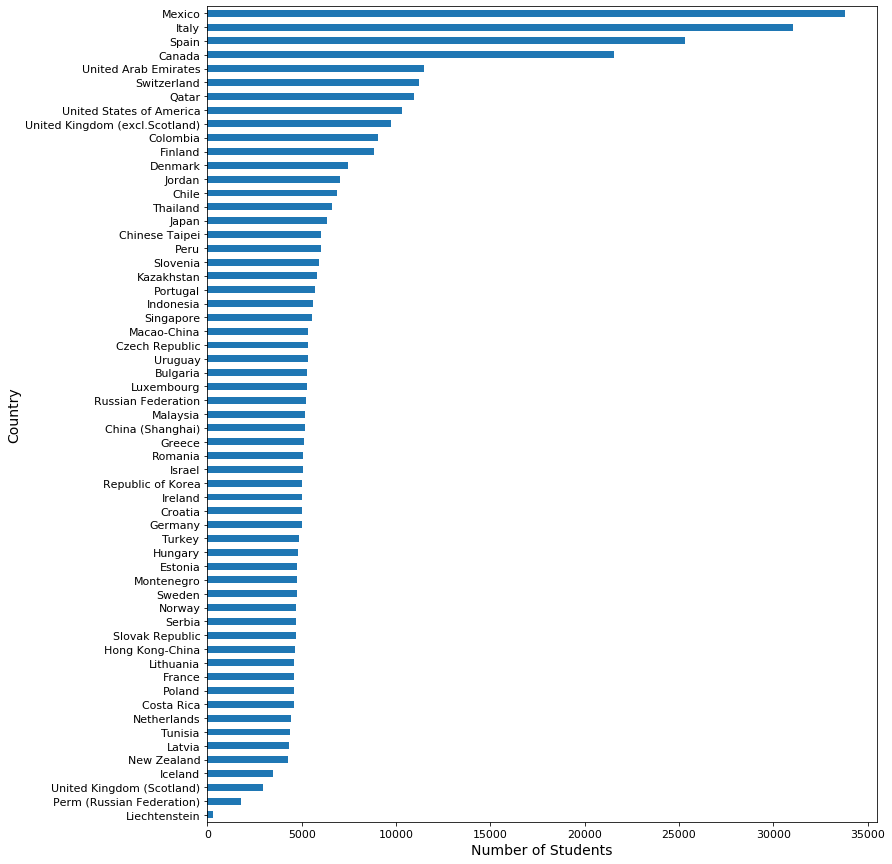

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 15)
df_clean['country'].value_counts(ascending=True).plot(kind="barh", fontsize=11)
ax.set_ylabel("Country", fontsize=14)
ax.set_xlabel("Number of Students", fontsize=14)

Mexico has the highest number of students who took PISA examination.

### Which countries have the highest percentage of advantaged students?

Text(0.5, 0, 'Percentage of Advantaged Students')

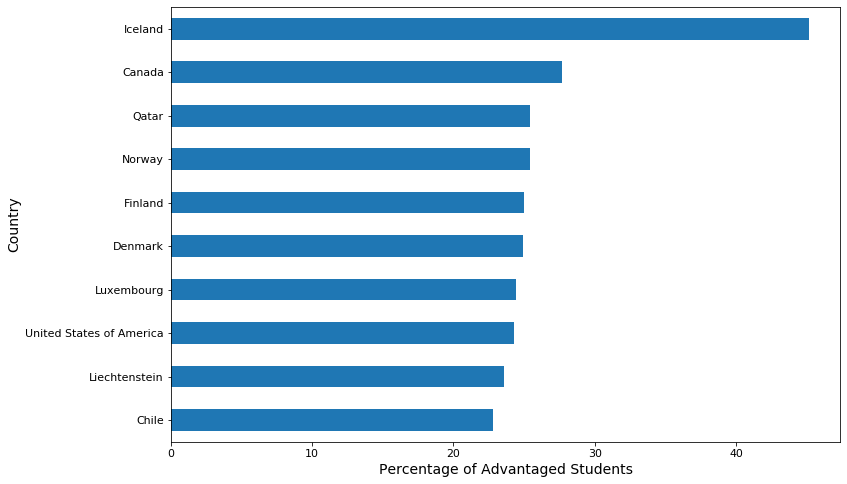

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
dt = (df_clean.query('ad == 1').groupby('country')['student_id'].count() /
      df_clean.groupby('country')['student_id'].count()).sort_values() * 100
dt.dropna().tail(10).plot(kind="barh", fontsize=11)
ax.set_ylabel("Country", fontsize=14)
ax.set_xlabel("Percentage of Advantaged Students", fontsize=14)

We can see top 10 countries having the highest percentage of advantaged and disadvantaged students. Indonesia has the highest percentage of disadvantaged students, while Iceland has the highest percentage of advantaged students among countries.

### Which countries have the highest percentage of disadvantaged students?

Text(0.5, 0, 'Percentage of Disadvantaged Students')

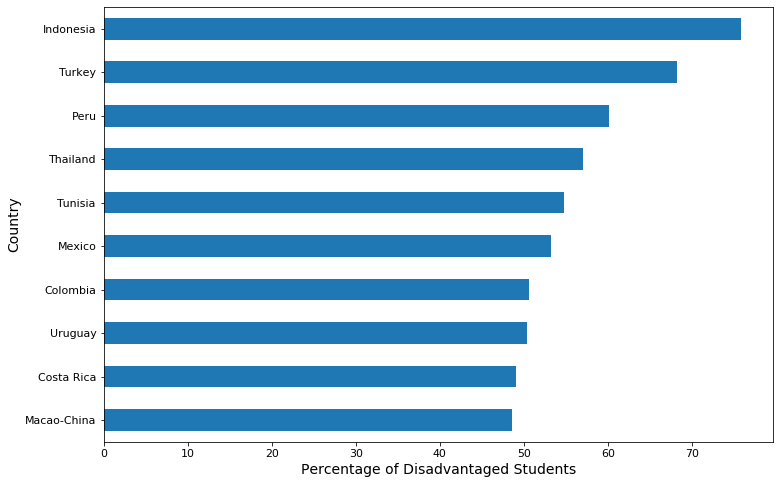

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
dt = (df_clean.query('disad == 1').groupby('country')['student_id'].count() /
      df_clean.groupby('country')['student_id'].count()).sort_values()* 100
dt.dropna().tail(10).plot(kind="barh", fontsize=11)
ax.set_ylabel("Country", fontsize=14)
ax.set_xlabel("Percentage of Disadvantaged Students", fontsize=14)

### Age Started Learning Language

In [27]:
df_clean['age_learn'].value_counts(normalize = True)*100

0 to 3 years         63.666063
4 to 6 years         23.359688
7 to 9 years          7.749959
10 to 12 years        3.206501
13 years or older     2.017789
Name: age_learn, dtype: float64

Text(0.5, 0, 'Age groups')

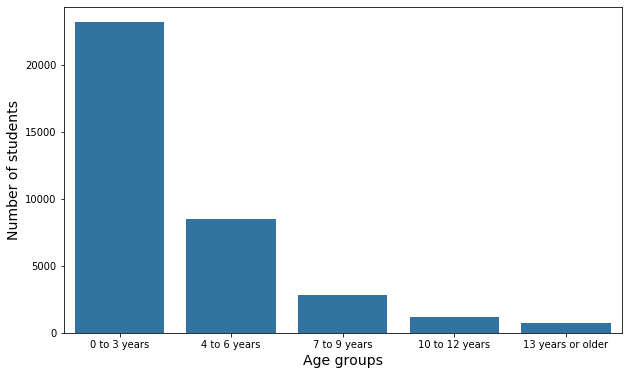

In [28]:
base_color = sns.color_palette()[0]
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.countplot(data=df_clean, x='age_learn', color=base_color)
ax.set_ylabel("Number of students", fontsize=14)
ax.set_xlabel("Age groups", fontsize=14)

The group of students who start learning language from 0 to 3 years old was dominated in PISA test, occupying 64% of total students.

## Bivariate Exploration

In [29]:
vars = ['ESCS', 'overall_score', 'math_score', 'read_score',
    'sci_score', 'civil_liberties']

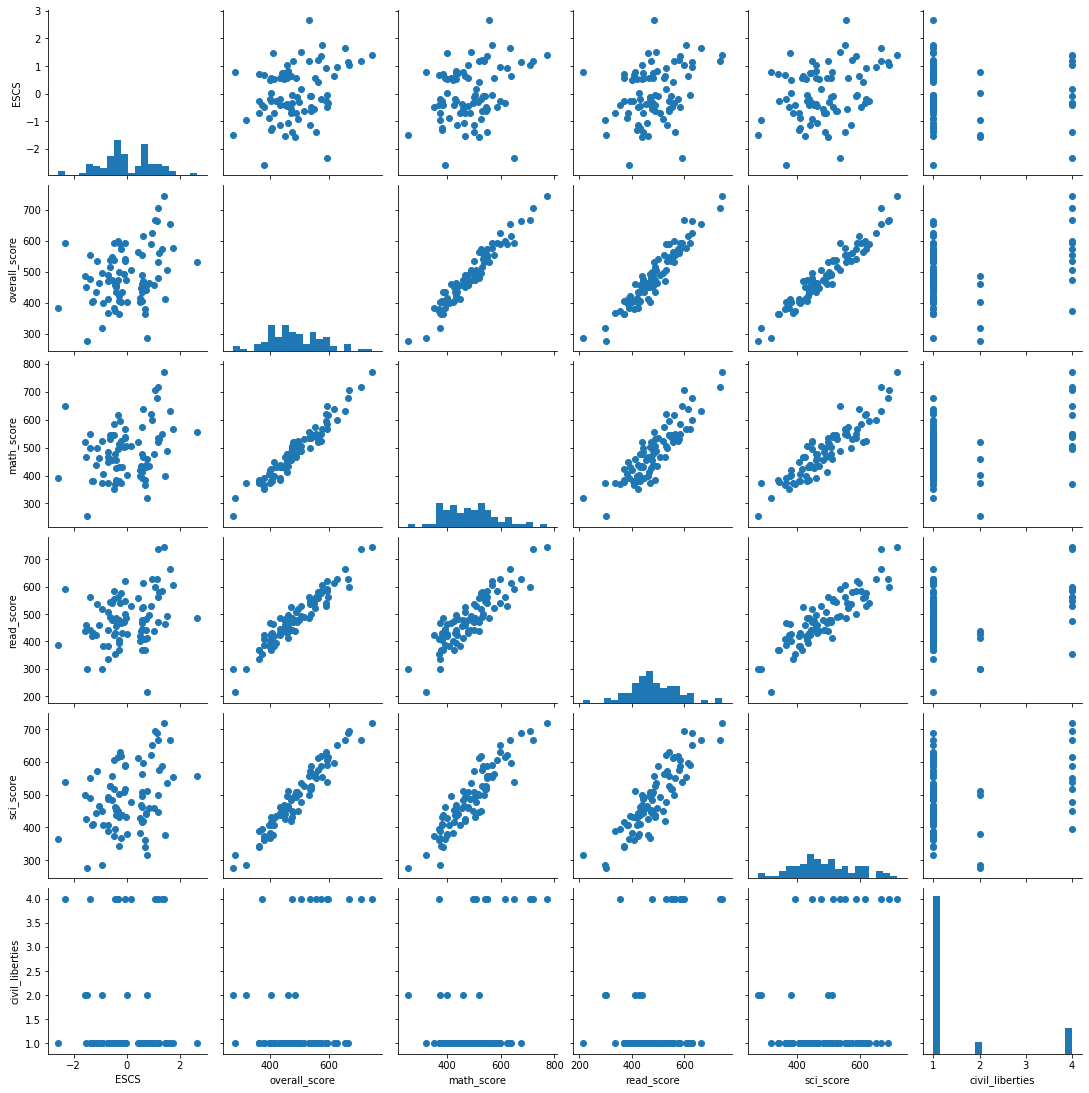

In [30]:
samp = np.random.choice(df_clean.shape[0], 1000, replace=False)
df_spl = df_clean.loc[samp, :]

g = sns.PairGrid(data=df_spl.dropna(), vars=vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter)
plt.show()

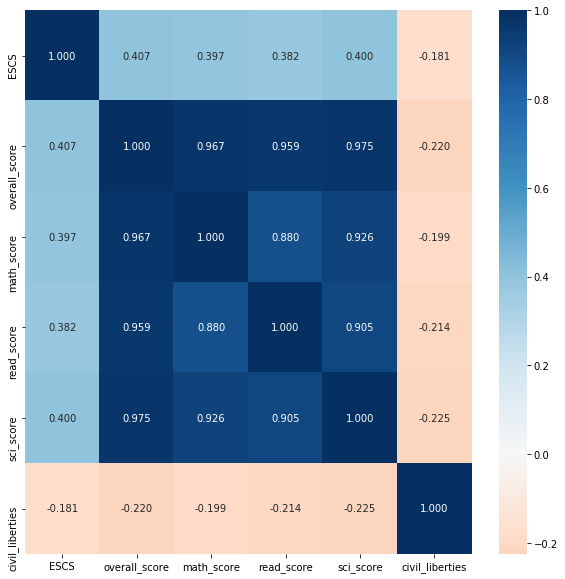

In [31]:
# correlation plot
plt.figure(figsize=[10, 10])
sns.heatmap(df_clean[vars].corr(),
           annot=True,
           fmt='.3f',
           cmap='RdBu',
           center=0)
plt.show()

We can see that there is a good correlation between the math, reading, and science literacy scores. ESCS has medium correlation with the academic scores. On the other hand, civil liberties are weakly negatively correlated with the academic scores.

### Overall Scores and Civil Liberties Analysis

Text(0.5, 0, 'Civil Liberty Scores (1=most, 6=least free)')

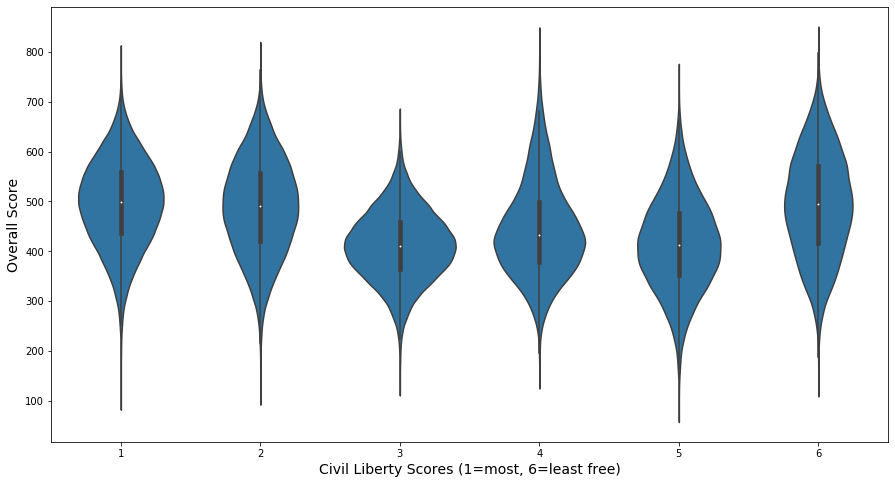

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.violinplot(data=df_clean,
            x='civil_liberties',
            y='overall_score',
            color=base_color)
ax.set_ylabel("Overall Score", fontsize=14)
ax.set_xlabel("Civil Liberty Scores (1=most, 6=least free)", fontsize=14)

When we look at overall literacy by civil liberties category (1 = most free, 6 = least free) we can see that the most and least free countries seem to perform the best, with a slight decline from most to least free in the middle range (2-5).

### Reading Score and Age Started Learning Analysis

Text(0.5, 1.0, 'Reading Score by Age Started Learning')

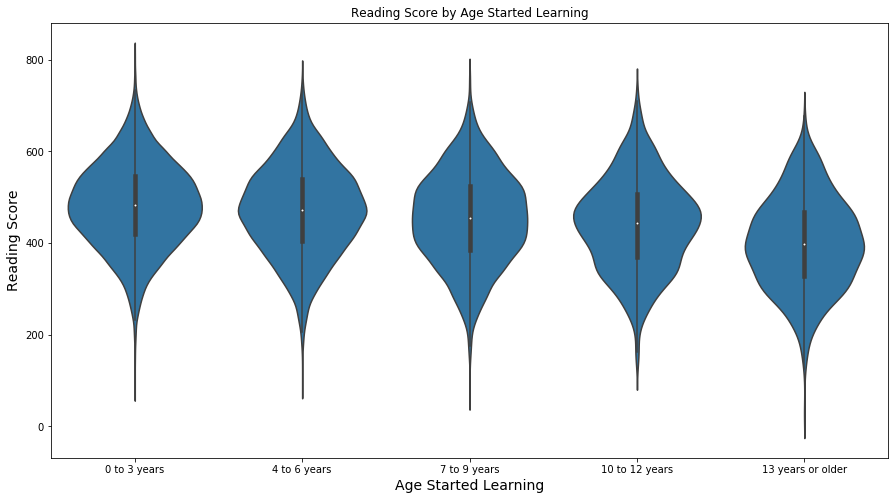

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.violinplot(data=df_clean,
               x='age_learn',
               y='read_score',
               color=base_color)
ax.set_ylabel("Reading Score", fontsize=14)
ax.set_xlabel("Age Started Learning", fontsize=14)
ax.set_title("Reading Score by Age Started Learning")

From a visual inspection, it appears that reading literacy declines the longer a student goes before starting to learn. We might expect that since students were age 15 when they took the exam. Students in the 13 years and older category would have been studying the test language for no more than 2 years.

### Relationship between Disadvantage/Advantage and Overall Literacy

In [34]:
df_dis = pd.DataFrame(df_clean.query('disad == 1'),
                   columns=['overall_score']).assign(opp='Disadvantaged')
df_nor = pd.DataFrame(df_clean.query('ad == 0 and disad == 0'),
                   columns=['overall_score'
                           ]).assign(opp='Neither Advantaged\nnor Disadvantaged')
df_ad = pd.DataFrame(df_clean.query('ad == 1'),
                   columns=['overall_score']).assign(opp='Advantaged')

cdf = pd.concat([df_dis, df_nor, df_ad])

Text(0.5, 1.0, 'Overall Score by Opportunity')

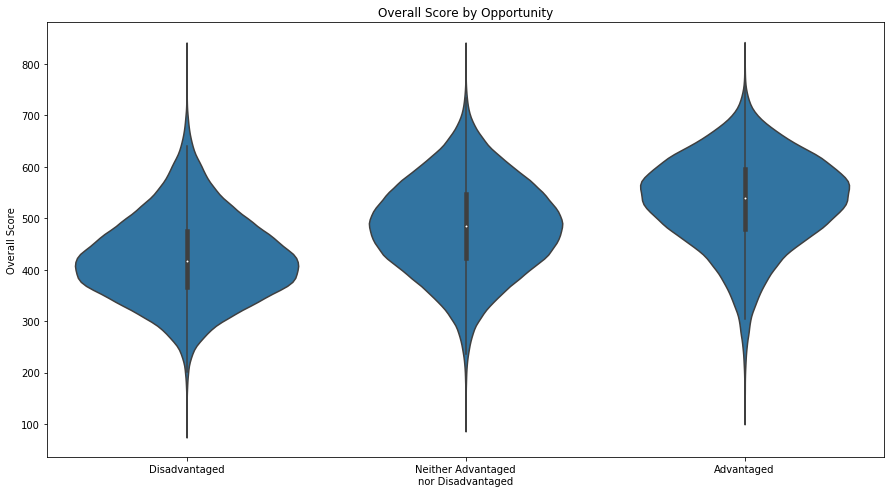

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.violinplot(x='opp', y='overall_score', data=cdf, color = base_color)
ax.set_xlabel(None)
ax.set_ylabel("Overall Score")
ax.set_title("Overall Score by Opportunity")

We can see the significant difference in overall academic literacy based on opportunity status. Disadvantaged students have their scores low, below the median of 500. Meanwhile, advantaged students appear to have their scores higher than others.

## Multivariate Exploration

### Gender, Age Started Learning Language, and Reading Literacy Analysis

Text(0.5, 0, 'Age Started Learning Language')

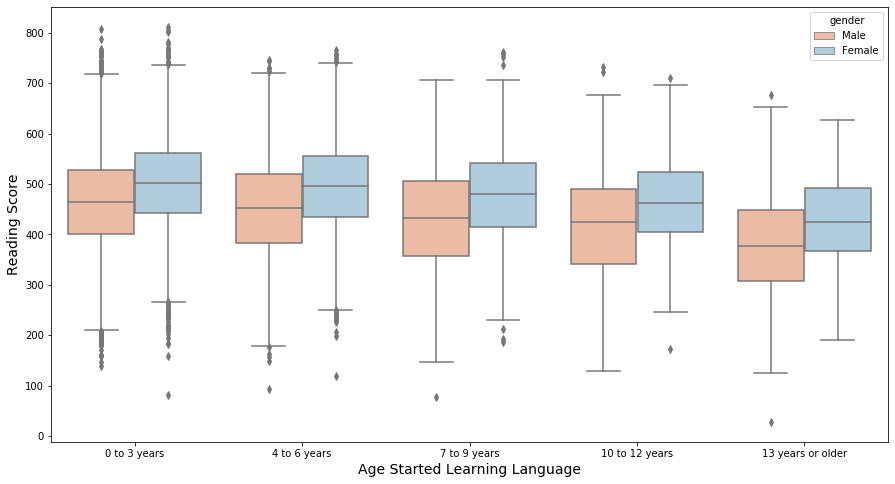

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.boxplot(data=df_clean,
            x='age_learn',
            y='read_score',
            palette='RdBu',
            hue='gender')
ax.set_ylabel("Reading Score", fontsize=14)
ax.set_xlabel("Age Started Learning Language", fontsize=14)

We can see that reading performance of students learned the test language later is lower than other groups of student. Notice that the test subjects were 15-year-olds, meaning that students who only started learning the test language at 13 years or older had fewer than two years of familiarity with the language at test time.

Male students appear to perform worse overall than female students, and the performance gap between female and male students seems to increase the later students first began learning the language.

### ESCS, Age Started Learning, and Reading Literacy Analysis

Text(0, 0.5, 'ESCS')

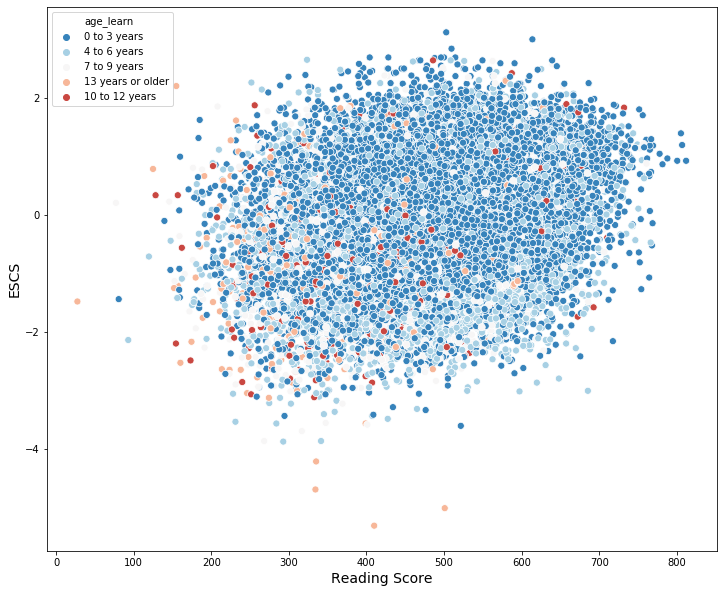

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.scatterplot(data=df_clean.dropna(),
                x='read_score',
                y='ESCS',
                palette="RdBu_r",
                hue='age_learn',
                s=50)
ax.set_xlabel("Reading Score", fontsize=14)
ax.set_ylabel("ESCS", fontsize=14)

We can see several points for 13 years or older in the lower-left of our plot, both performing poorly on the literacy and below the mean ESCS (disadvantaged).

### Country, Overall Socre, and Civil Liberties Analysis

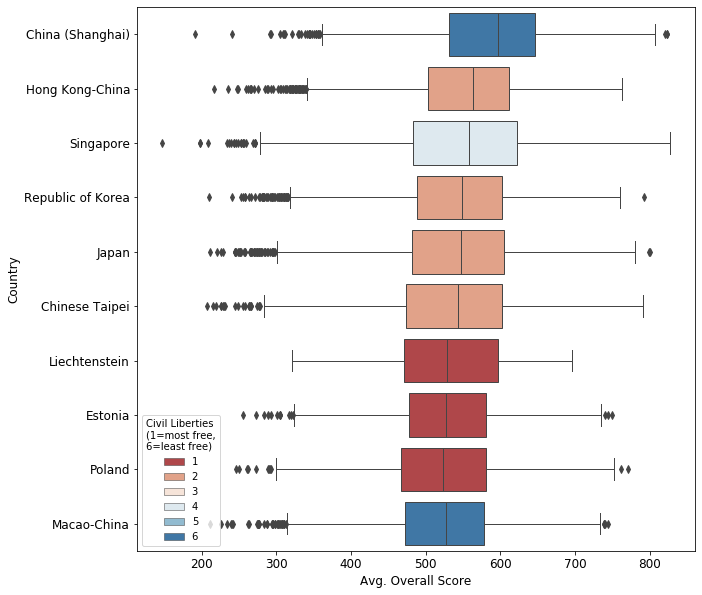

In [38]:
df_ana = df_clean.groupby('country')['overall_score'].mean().sort_values(
    ascending=False).head(10)

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.boxplot(data=df_clean,
            y='country',
            x='overall_score',
            order=df_ana.index.get_level_values('country'),
            dodge=False,
            palette='RdBu',
            hue='civil_liberties',
            width=0.8,
            linewidth=1)
ax.set_ylabel("Country", fontsize=12)
ax.set_xlabel("Avg. Overall Score", fontsize=12)
legend = ax.legend(loc='best', title_fontsize=10).set_title(
    'Civil Liberties\n(1=most free,\n6=least free)')
ax.tick_params(labelsize=12)

Regardless of civil liberities, Asian countries like China, Singapore, Korea, Japan ranked at top of countries having high performance in PISA tests. 

### Country, ESCS, and Civil Liberties Analysis

When we look at the overall economic, social, and cultural status for each nation, we can see that the top countries are primarily free nations on the Freedom House Civil Liberties scale.

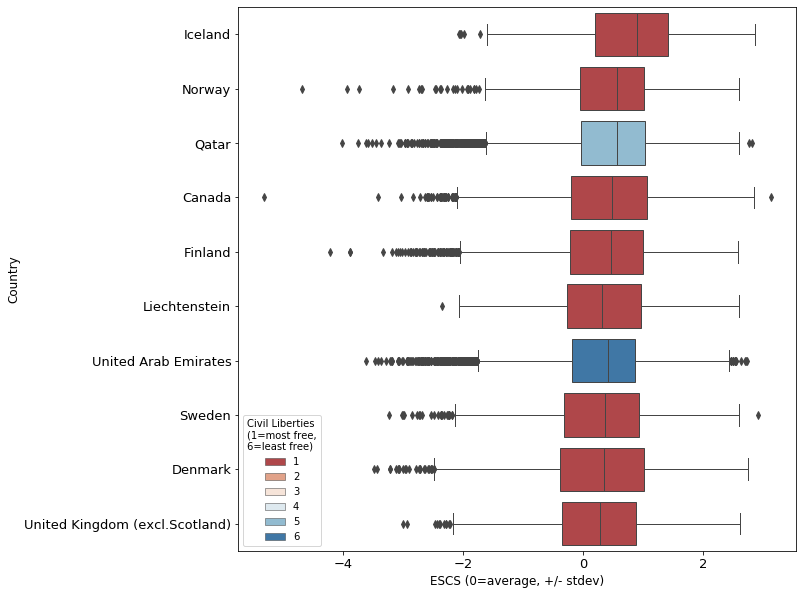

In [39]:
df_ana = df_clean.groupby('country')['ESCS'].mean().sort_values(
    ascending=False).dropna().head(10)

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.boxplot(data=df_clean,
            y='country',
            x='ESCS',
            order=df_ana.index.get_level_values('country'),
            dodge=False,
            palette='RdBu',
            hue='civil_liberties',
            width=0.8,
            linewidth=1)
ax.set_ylabel("Country", fontsize=12)
ax.set_xlabel("ESCS (0=average, +/- stdev)", fontsize=12)
legend = ax.legend(loc='best', title_fontsize=10).set_title(
    'Civil Liberties\n(1=most free,\n6=least free)')
ax.tick_params(labelsize=13)